In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [5]:
train_dir = '/content/drive/MyDrive/영우_4기_딥러닝/dataset/cats_and_dogs_small/train'
valid_dir = '/content/drive/MyDrive/영우_4기_딥러닝/dataset/cats_and_dogs_small/validation'
test_dir = '/content/drive/MyDrive/영우_4기_딥러닝/dataset/cats_and_dogs_small/test'

In [33]:
#DataLoader
train_datagen = keras.preprocessing.image.ImageDataGenerator()
valid_datagen = keras.preprocessing.image.ImageDataGenerator()
test_datagen = keras.preprocessing.image.ImageDataGenerator()

In [14]:
batch_size = 20
train_generator = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = (150,150),
    batch_size = batch_size,
    interpolation = 'bilinear',
    color_mode = 'rgb',
    shuffle = 'True',
    class_mode = 'binary'
)
valid_generator =valid_datagen.flow_from_directory(
    directory = valid_dir,
    target_size = (150,150),
    batch_size = batch_size,
    interpolation = 'bilinear',
    color_mode = 'rgb',
    shuffle = 'True',
    class_mode = 'binary'
)

Found 3421 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
augmenation = keras.Sequential(
    [
        keras.layers.RandomFlip("horizontal"),
        keras.layers.RandomRotation(0.1),
    ]
)
model = keras.Sequential([
    keras.Input(shape = (150,150,3)),
    augmenation,
    
    keras.layers.Conv2D(32,3, padding = 'same',activation = 'relu',kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(64,3, padding = 'same',activation = 'relu',kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(),
    

    keras.layers.Conv2D(128,3, padding = 'same',activation = 'relu',kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(),
     keras.layers.Conv2D(256,3, padding = 'same',activation = 'relu',kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(),
    
     keras.layers.Conv2D(512,3, padding = 'same',activation = 'relu',kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(),
    
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation = 'sigmoid')
    ])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
batch_normalization_9 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 37, 37, 64)       

In [24]:
!nvidia-smi

Fri Oct 29 04:18:35 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.29.05    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    74W / 149W |   2305MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [25]:
loss = keras.losses.binary_crossentropy
optim = keras.optimizers.Adam()
metric = keras.metrics.binary_accuracy

model.compile(
    loss = loss,
    optimizer = optim,
    metrics = [metric])



In [26]:
# 모델 최적화 설정
import os
MODEL_DIR = '/content/model_data'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath= MODEL_DIR + '/{epoch:02d}-{val_loss:.4f}.hdf5'
callback_list=[tf.keras.callbacks.ModelCheckpoint(filepath = modelpath, monitor = 'val_loss',verbose = 1,save_best_only= True),
               tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience = 15)]

In [27]:
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')


history = model.fit(
    train_generator,
    steps_per_epoch = (len(os.listdir(train_cats_dir))+len(os.listdir(train_dogs_dir))) / batch_size,
    epochs = 1000,
    validation_data = valid_generator,
    callbacks = callback_list,
    validation_freq = 1,
)

Epoch 1/1000
171/171 [==============================] - 35s 193ms/step - loss: 2.0440 - binary_accuracy: 0.5750 - val_loss: 0.6548 - val_binary_accuracy: 0.6100

Epoch 00001: val_loss improved from inf to 0.65483, saving model to /content/model_data/01-0.6548.hdf5
Epoch 2/1000
171/171 [==============================] - 33s 190ms/step - loss: 0.7509 - binary_accuracy: 0.6326 - val_loss: 0.6236 - val_binary_accuracy: 0.6380

Epoch 00002: val_loss improved from 0.65483 to 0.62356, saving model to /content/model_data/02-0.6236.hdf5
Epoch 3/1000
171/171 [==============================] - 33s 195ms/step - loss: 0.6431 - binary_accuracy: 0.6583 - val_loss: 0.6059 - val_binary_accuracy: 0.6810

Epoch 00003: val_loss improved from 0.62356 to 0.60590, saving model to /content/model_data/03-0.6059.hdf5
Epoch 4/1000
171/171 [==============================] - 34s 197ms/step - loss: 0.6230 - binary_accuracy: 0.6706 - val_loss: 0.6136 - val_binary_accuracy: 0.6600

Epoch 00004: val_loss did not impro

In [10]:
 image, label = next(valid_generator)

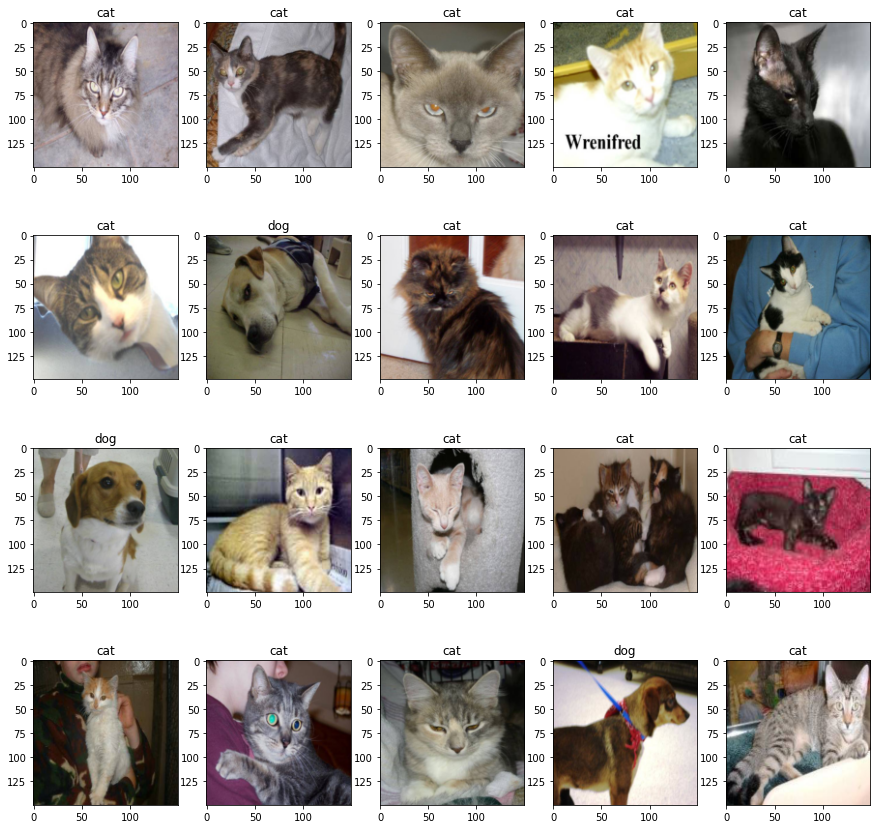

In [17]:
plt.figure(figsize = (15,15))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(image[i]/255)
  if label[i] == 0:
    plt.title('cat')
  else:
    plt.title('dog')
plt.show()

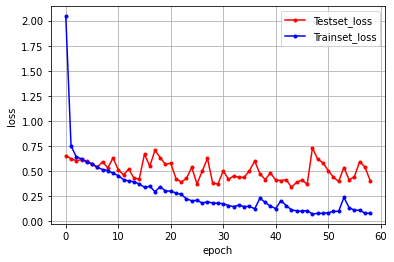

In [30]:
import numpy as np
import matplotlib.pyplot as plt
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [28]:
model = keras.models.load_model('/content/model_data/44-0.3398.hdf5')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
batch_normalization_9 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 37, 37, 64)       

In [34]:
test_generator =test_datagen.flow_from_directory(
    directory = test_dir,
    target_size = (150,150),
    batch_size = batch_size,
    interpolation = 'bilinear',
    color_mode = 'rgb',
    shuffle = 'True',
    class_mode = 'binary'
)

Found 1980 images belonging to 2 classes.


In [35]:
model.evaluate(test_generator)

99/99 [==============================] - 354s 4s/step - loss: 0.4888 - binary_accuracy: 0.8652


[0.48879823088645935, 0.8651515245437622]

In [66]:
image, label = next(test_generator)
pred = model.predict(image)
pred = np.clip(pred, 0.02, 0.98)

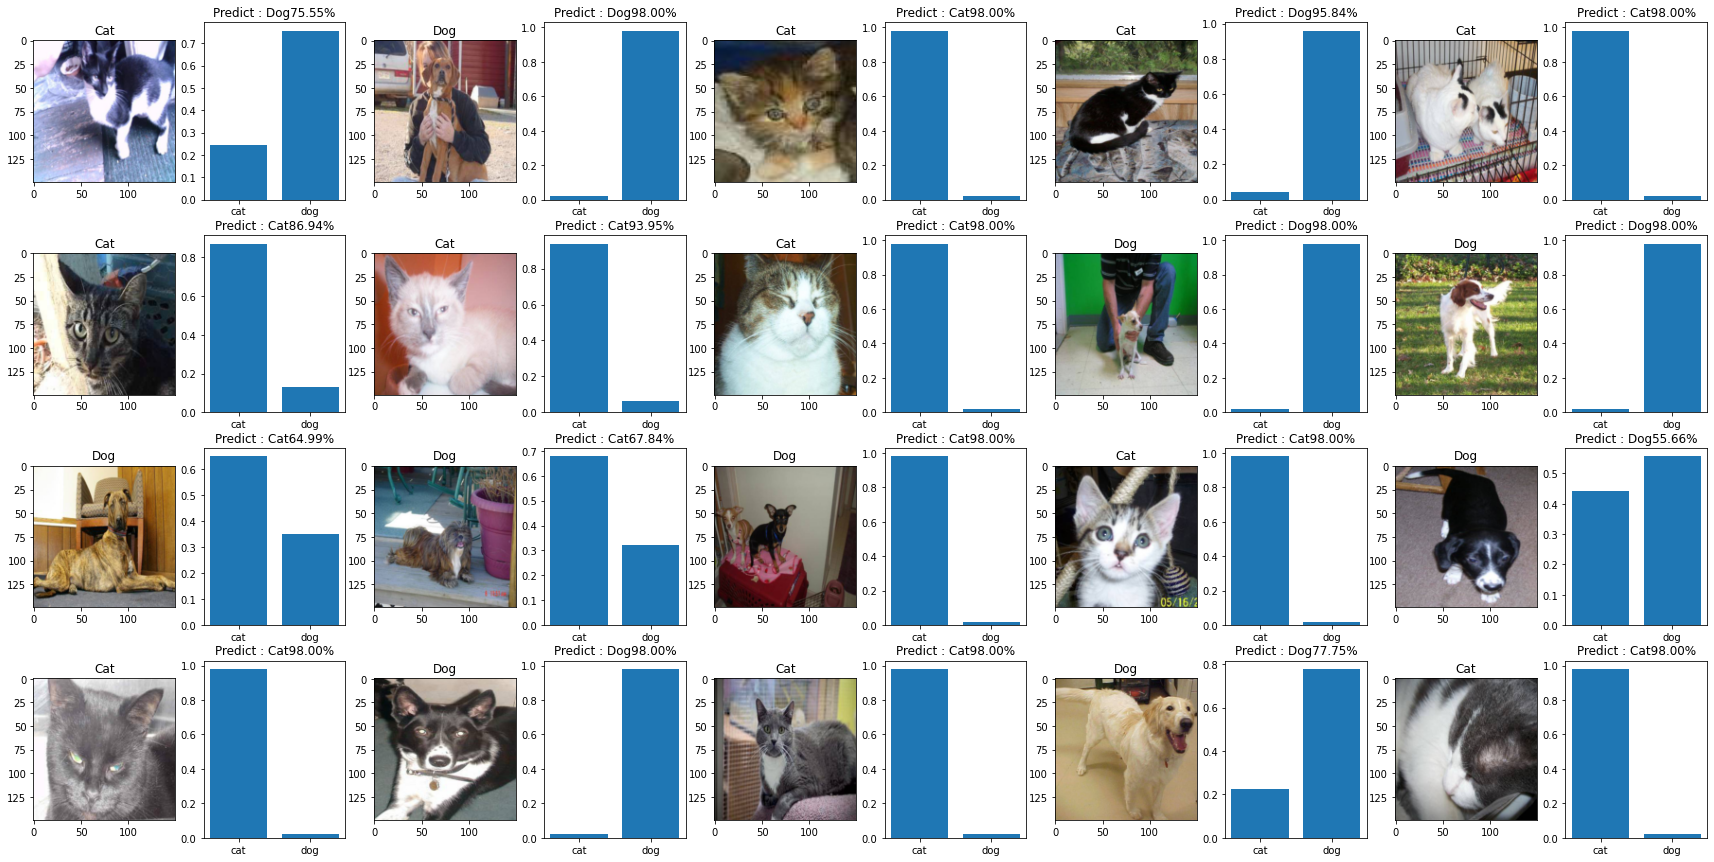

In [73]:
plt.figure(figsize = (30,15))
for i in range(1,21):
  plt.subplot(4,10,2*i-1)
  plt.imshow(image[i-1]/255)
  if label[i-1] == 0:
    plt.title('Cat')
  else:
    plt.title('Dog')
  predict_array = [1-pred[i-1][0],pred[i-1][0]]
  if pred[i-1][0] > 0.5:
    name = 'Dog' 
    per = pred[i-1][0]
  else:
    name = 'Cat'
    per = 1-pred[i-1][0]
  plt.subplot(4,10,2*i)
  plt.bar(['cat','dog'],predict_array)

  plt.title(f'Predict : {name}{per*100:.2f}%')

plt.show()



In [94]:
names = ['cat','dog']

fnames = sorted([os.path.join(test_dir,'dogs',fname) for fname in os.listdir(os.path.join(test_dir,'dogs'))])

fnames[:3]

['/content/drive/MyDrive/영우_4기_딥러닝/dataset/cats_and_dogs_small/test/dogs/dog.1500.jpg',
 '/content/drive/MyDrive/영우_4기_딥러닝/dataset/cats_and_dogs_small/test/dogs/dog.1501.jpg',
 '/content/drive/MyDrive/영우_4기_딥러닝/dataset/cats_and_dogs_small/test/dogs/dog.1502.jpg']

In [78]:
img_path = fnames[3]

In [89]:
# 이미지를 읽고 크기를 변경
import cv2

img = cv2.imread(img_path)
img_resize = cv2.resize(img,(128,128))


In [90]:
M = cv2.getRotationMatrix2D((128/2,128/2),0,1) # Matrix 생성

M[0,2] = M[0,2] + 5
M[1,2] = M[1,2] + 5

In [91]:
test_image = cv2.warpAffine(img_resize,M,(128,128))
test_image.shape

(128, 128, 3)

In [92]:
test_image_reshape = test_image.reshape(1,128,128,3)

In [93]:
y = model.predict(test_image_reshape)

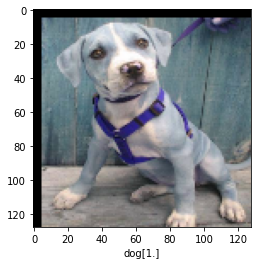

In [95]:
if y[0] <=0.5:
  class_num = 0
else:
  class_num = 1

plt.imshow(test_image)
plt.xlabel(names[class_num] + str(y[0]))
plt.show()